### Choose a numerical dataset and implement at least two different methods for  outlier detection  (e.g.,  Z-score,  IQR).  Write  a  script  that  identifies  these  outliers  and  then handles  them  either  by  removal  or  by  value  capping/replacement.  Compare  and contrast the distribution of the key feature before and after handling the outliers.

In [1]:
#%%
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for plots
sns.set_theme(style="whitegrid")

# Load the dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# We will focus on the 'MedInc' (Median Income in $10,000s)
# Create a new DataFrame 'data' to work with, isolating our feature
data = pd.DataFrame(df['MedInc'], columns=['MedInc'])

print("--- Dataset Description (MedInc) ---")
print(data.describe())

--- Dataset Description (MedInc) ---
             MedInc
count  20640.000000
mean       3.870671
std        1.899822
min        0.499900
25%        2.563400
50%        3.534800
75%        4.743250
max       15.000100


--- Original Distribution of Median Income ---


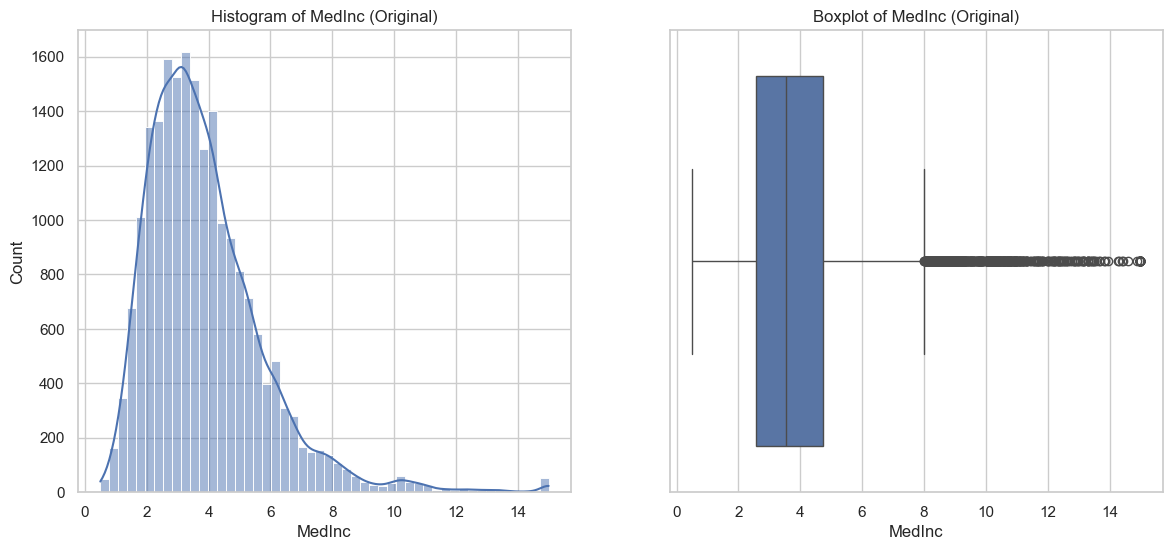

Observations:
Skewness: 1.65
The histogram shows a long right tail (positive skew).
The boxplot clearly shows many data points (circles) beyond the upper whisker, which are potential outliers.


In [2]:
#%%
print("--- Original Distribution of Median Income ---")

plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['MedInc'], kde=True, bins=50)
plt.title('Histogram of MedInc (Original)')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['MedInc'])
plt.title('Boxplot of MedInc (Original)')
plt.show()

print("Observations:")
print(f"Skewness: {data['MedInc'].skew():.2f}")
print("The histogram shows a long right tail (positive skew).")
print("The boxplot clearly shows many data points (circles) beyond the upper whisker, which are potential outliers.")

In [3]:
#%%
# Create a copy to work on
data_zscore = data.copy()

# Calculate Z-scores
data_zscore['zscore'] = (data_zscore['MedInc'] - data_zscore['MedInc'].mean()) / data_zscore['MedInc'].std()

# Define the threshold
z_threshold = 3

# Identify outliers
outliers_zscore = data_zscore[np.abs(data_zscore['zscore']) > z_threshold]
print(f"--- Z-Score Method (Threshold={z_threshold}) ---")
print(f"Number of outliers detected: {len(outliers_zscore)}")
print(f"Original data shape: {data.shape}")

# Handle outliers by REMOVING them
data_zscore_removed = data_zscore[np.abs(data_zscore['zscore']) <= z_threshold].drop(columns=['zscore'])
print(f"New data shape after removal: {data_zscore_removed.shape}")

--- Z-Score Method (Threshold=3) ---
Number of outliers detected: 345
Original data shape: (20640, 1)
New data shape after removal: (20295, 1)


In [4]:
#%%
# Create a copy to work on
data_iqr = data.copy()

# Calculate Q1, Q3, and IQR
Q1 = data_iqr['MedInc'].quantile(0.25)
Q3 = data_iqr['MedInc'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\n--- IQR Method ---")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower Bound (Outliers <): {lower_bound:.2f}")
print(f"Upper Bound (Outliers >): {upper_bound:.2f}")

# Identify outliers
outliers_iqr = data_iqr[(data_iqr['MedInc'] < lower_bound) | (data_iqr['MedInc'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers_iqr)}")

# Handle outliers by CAPPING
data_iqr_capped = data_iqr.copy()
# np.clip() is perfect for this: it "clips" values at the specified min and max
data_iqr_capped['MedInc'] = np.clip(data_iqr_capped['MedInc'], lower_bound, upper_bound)

print(f"Data shape is unchanged: {data_iqr_capped.shape}")
print(f"Original max value: {data['MedInc'].max():.2f}")
print(f"Capped max value: {data_iqr_capped['MedInc'].max():.2f}")


--- IQR Method ---
Q1: 2.56, Q3: 4.74, IQR: 2.18
Lower Bound (Outliers <): -0.71
Upper Bound (Outliers >): 8.01
Number of outliers detected: 681
Data shape is unchanged: (20640, 1)
Original max value: 15.00
Capped max value: 8.01



--- Comparing Distributions: Before vs. After ---


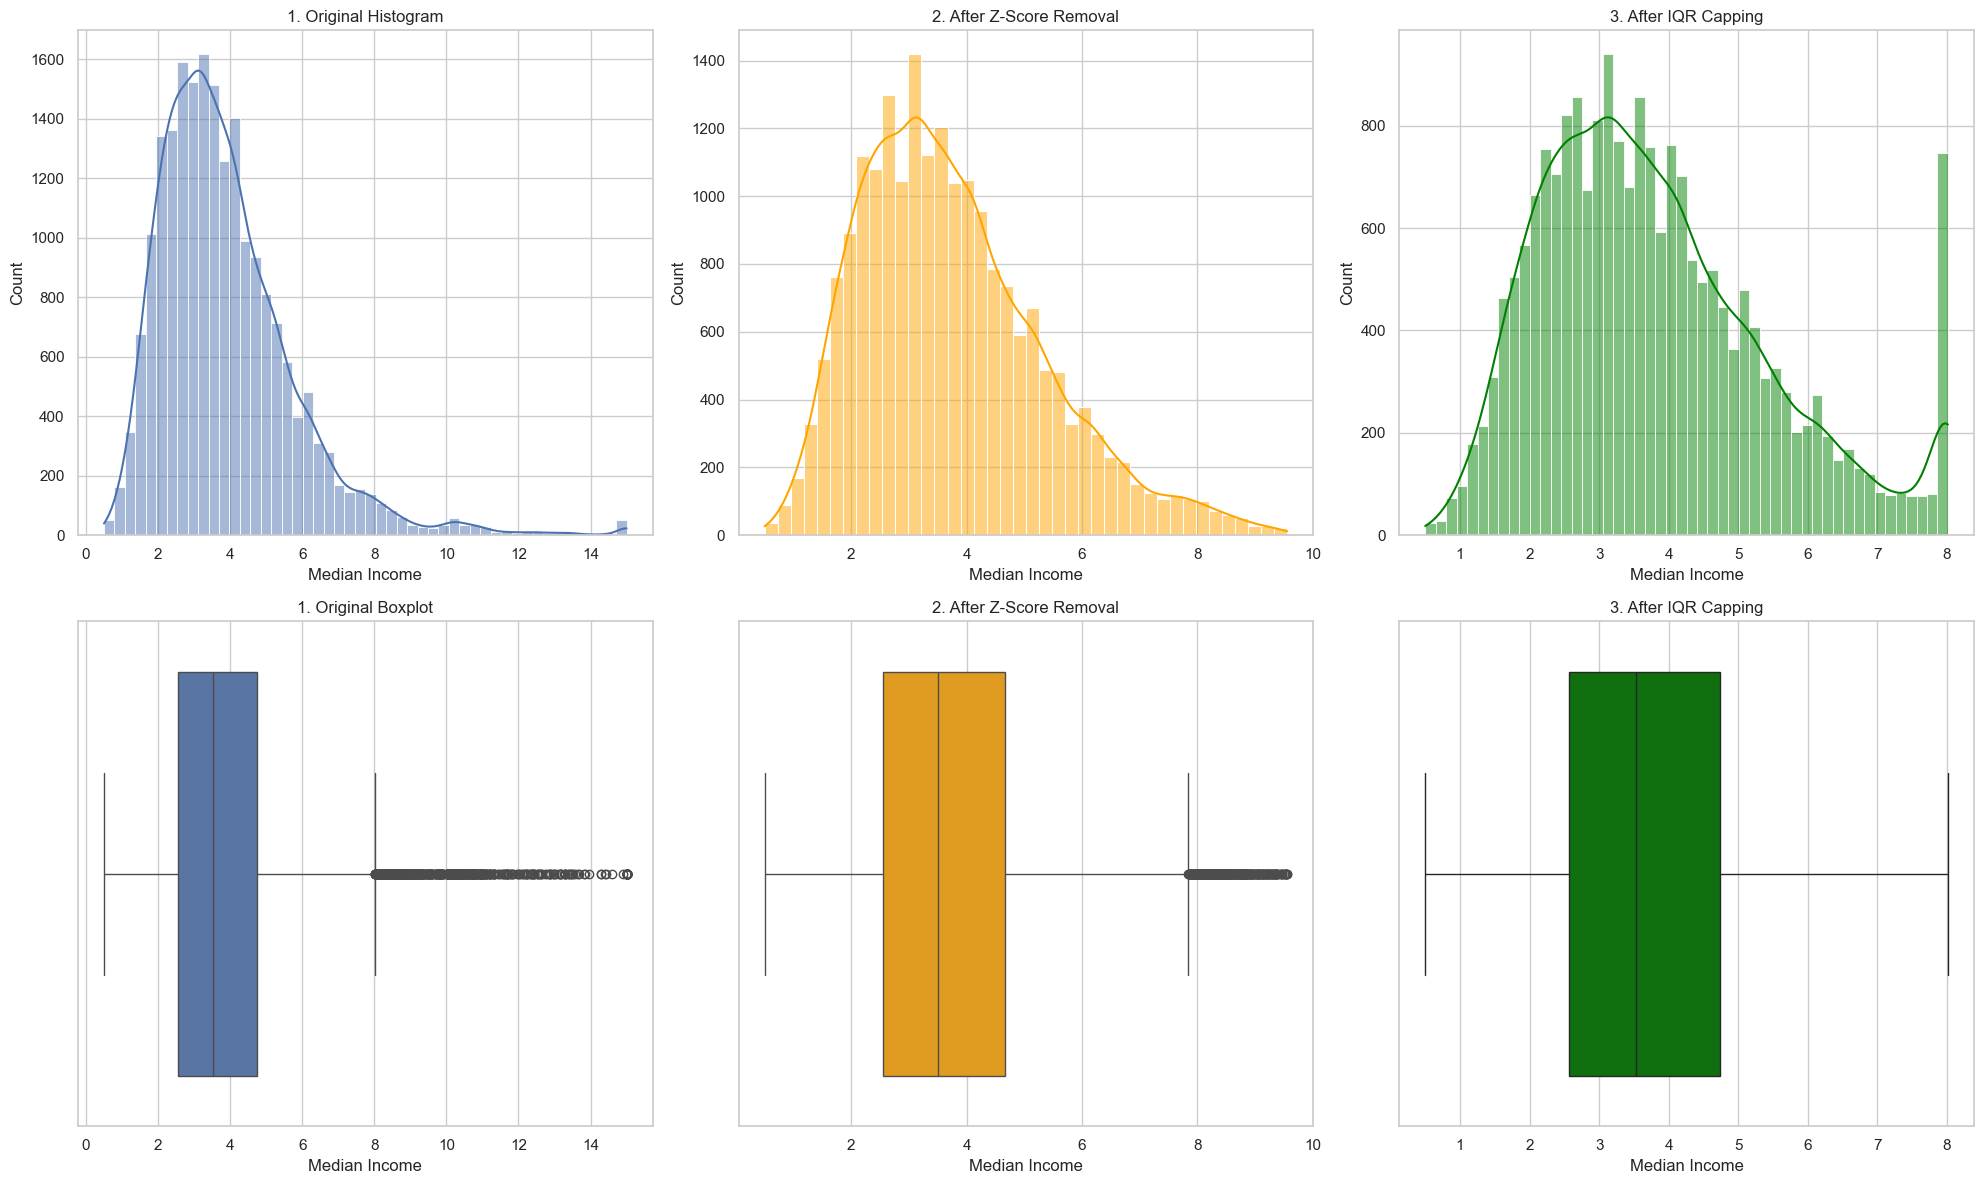

In [5]:
#%%
print("\n--- Comparing Distributions: Before vs. After ---")

plt.figure(figsize=(20, 12))

# --- Row 1: Histograms ---

# 1. Original
plt.subplot(2, 3, 1)
sns.histplot(data['MedInc'], kde=True, bins=50)
plt.title('1. Original Histogram')
plt.xlabel('Median Income')

# 2. Z-Score Removed
plt.subplot(2, 3, 2)
sns.histplot(data_zscore_removed['MedInc'], kde=True, bins=40, color='orange')
plt.title('2. After Z-Score Removal')
plt.xlabel('Median Income')

# 3. IQR Capped
plt.subplot(2, 3, 3)
sns.histplot(data_iqr_capped['MedInc'], kde=True, bins=50, color='green')
plt.title('3. After IQR Capping')
plt.xlabel('Median Income')

# --- Row 2: Boxplots ---

# 1. Original
plt.subplot(2, 3, 4)
sns.boxplot(x=data['MedInc'])
plt.title('1. Original Boxplot')
plt.xlabel('Median Income')

# 2. Z-Score Removed
plt.subplot(2, 3, 5)
sns.boxplot(x=data_zscore_removed['MedInc'], color='orange')
plt.title('2. After Z-Score Removal')
plt.xlabel('Median Income')

# 3. IQR Capped
plt.subplot(2, 3, 6)
sns.boxplot(x=data_iqr_capped['MedInc'], color='green')
plt.title('3. After IQR Capping')
plt.xlabel('Median Income')

plt.tight_layout()
plt.show()